In [2]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('data Mashable.csv')
df

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375000,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000000,6000,3.778151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,24995,http://mashable.com/2013/09/25/parkinsons-spoon/,9,342,9,0,4.628655,0,0,0,...,0,0,0,0,0.448753,0.250524,0.642857,0.214286,8500,3.929419
24995,24996,http://mashable.com/2013/05/20/esquire-weekly-...,6,243,1,0,5.111111,0,0,1,...,0,0,0,0,0.418081,0.206035,0.000000,0.000000,675,2.829304
24996,24997,http://mashable.com/2014/07/13/google-world-cu...,11,1334,4,4,4.613943,0,1,0,...,0,0,1,1,0.486041,0.102557,0.288889,-0.155556,1500,3.176091
24997,24998,http://mashable.com/2013/01/17/thinkpad-chrome...,7,263,1,0,4.749049,0,0,0,...,0,0,0,0,0.627143,0.387381,0.000000,0.000000,817,2.912222


In [4]:
# I create a list of exact 5 variables. my selections are in the list
feature_list = ["num_imgs","global_subjectivity", "global_sentiment_polarity","title_subjectivity", "title_sentiment_polarity"]
shares = ["shares_log"]
df2 = df.loc[:,feature_list+shares]
df2

,num_imgs,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares_log
0,12,0.439379,0.082486,0.666667,0.375000,3.322219
1,6,0.300454,0.027715,0.000000,0.000000,2.437751
2,0,0.575486,0.259120,0.000000,0.000000,3.176091
3,2,0.327220,0.134424,0.000000,0.000000,3.301030
4,18,0.507709,0.109256,0.000000,0.000000,3.778151
...,...,...,...,...,...,...
24994,9,0.448753,0.250524,0.642857,0.214286,3.929419
24995,1,0.418081,0.206035,0.000000,0.000000,2.829304
24996,4,0.486041,0.102557,0.288889,-0.155556,3.176091
24997,1,0.627143,0.387381,0.000000,0.000000,2.912222


In [5]:
#Splitting the dataset into a training and test set %80-%20
training = df.loc[0:19999,feature_list+shares]
training

,num_imgs,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares_log
0,12,0.439379,0.082486,0.666667,0.375000,3.322219
1,6,0.300454,0.027715,0.000000,0.000000,2.437751
2,0,0.575486,0.259120,0.000000,0.000000,3.176091
3,2,0.327220,0.134424,0.000000,0.000000,3.301030
4,18,0.507709,0.109256,0.000000,0.000000,3.778151
...,...,...,...,...,...,...
19995,1,0.492500,0.187424,0.000000,0.000000,3.079181
19996,6,0.432319,0.038027,0.533333,-0.250000,3.732394
19997,20,0.000000,0.000000,0.000000,0.000000,3.230449
19998,1,0.425288,0.116796,0.718182,0.445455,2.831230


In [23]:
import numpy as np
test = df.loc[20000:25000,feature_list + shares]
test.index = np.arange(len(test)) # to start the index number from 0 instead of 20000
test



,num_imgs,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares_log
0,1,0.445956,0.094419,0.350000,-0.025000,2.897077
1,7,0.452080,0.067361,0.000000,0.000000,4.004321
2,0,0.532292,0.287500,0.000000,0.000000,3.079181
3,1,0.385395,0.035755,0.000000,0.000000,3.204120
4,1,0.391020,-0.002908,0.500000,0.000000,3.000000
...,...,...,...,...,...,...
4994,9,0.448753,0.250524,0.642857,0.214286,3.929419
4995,1,0.418081,0.206035,0.000000,0.000000,2.829304
4996,4,0.486041,0.102557,0.288889,-0.155556,3.176091
4997,1,0.627143,0.387381,0.000000,0.000000,2.912222


After regression, the equation I got is :
\begin{align}
y = 3.09 + 0.00x_{1} + 0.28x_{2} + 0.06x_{3} + 0.04x_{4} + 0.05x_{5}
\end{align}

#from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = training[feature_list] #dependent variable as I select
y = training["shares_log"] #independent variable
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b2 = lm.coef_[1] 
b3 = lm.coef_[2] 
b4 = lm.coef_[3] 
b5 = lm.coef_[4] 

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X1 + {b2:.2f}X2  + {b3:.2f}X3  + {b4:.2f}X4  + {b5:.2f}X5 ") #.0f formats to 2 decimals. 

In [24]:
resultList = []
for i in range(len(test)): #{b1:.2f}X1 = b1*test.loc[i,"num_imgs"]
    prediction = b0 + b1*test.loc[i,feature_list[0]] + b2*test.loc[i,feature_list[1]] + b3*test.loc[i,feature_list[2]] + b4*test.loc[i,feature_list[3]] + b5*test.loc[i,feature_list[4]]
    resultList.append(prediction)
    
    #i = 0 -> prediction = b0 + b1*1 + b2*0.4459 + b3*0.094419 + b4*0.350000 + b5*-0.025000
    #i = 0 -> Correct Value = 2.897077
    #i = 0 -> prediction = 3.235606

results = test.copy()  #test.copy() = test = df.loc[20000:25000,feature_list + shares]
results["shares_log_p"] = pd.DataFrame(resultList) #predictions are added as a new column to the dataframe

In [10]:
results.head()

,num_imgs,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares_log,shares_log_p
0,1,0.445956,0.094419,0.35,-0.025,2.897077,3.235606
1,7,0.452080,0.067361,0.00,0.000,4.004321,3.245145
2,0,0.532292,0.287500,0.00,0.000,3.079181,3.255074
3,1,0.385395,0.035755,0.00,0.000,3.204120,3.202538
4,1,0.391020,-0.002908,0.50,0.000,3.000000,3.221680


In [11]:
#mask = df["num_imgs"] >2  if I need some filters in test data
#testwithimbgt2 = df.where(mask)

In [12]:
#testwithimbgt2.dropna()

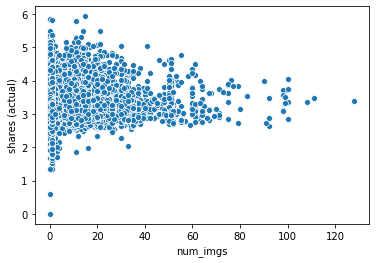

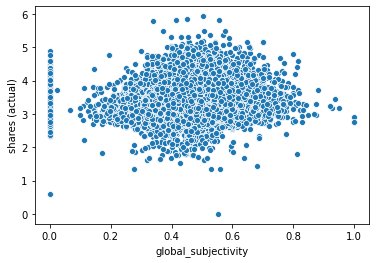

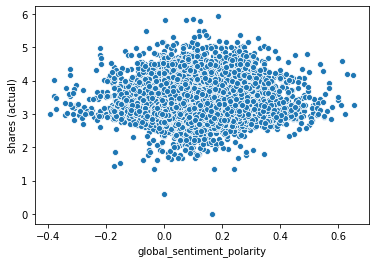

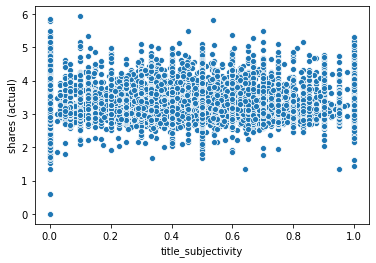

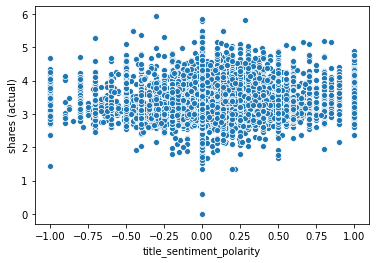

In [13]:
for feature in feature_list:
    sns.scatterplot(x=feature,y='shares_log',data=df)
    plt.xlabel(feature)
    plt.ylabel('shares (actual)')
    plt.show()

#Plots of the relation of your selected variables with the target
#I look at the relation between all variable with shares.

In [ ]:
r2_score(results['shares_log'], results['shares_log_p']) #this gives the model fit (R2) for the Y and predicted Y



In [ ]:
math.sqrt(mean_squared_error(results['shares_log'], results['shares_log_p'])) #this gives the model fit (R2) for the Y and predicted Y

In [ ]:
results['resid'] = results['shares_log'] - results['shares_log_p'] #get the residuals by subtracting the prediction from the actual views
results['resid']

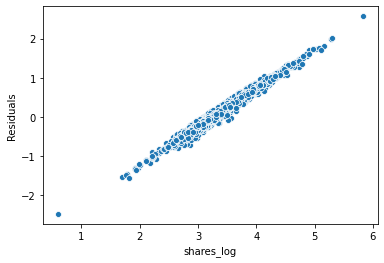

In [20]:
sns.scatterplot(x='shares_log',y='resid',data=results)
plt.xlabel('shares_log')
plt.ylabel('Residuals')
plt.show()